# Vectoria

## Load libraries

In [19]:
from PIL import Image
import numpy as np
import svgwrite
import sys
from IPython.display import display
import pdb

sys.path.append('../')
from src.vectoria.arg_parse import *
from src.vectoria.shared_variables import *

## Custom image functions for numpy arrays 

In [5]:
def display_as_img(image_array):
    image = Image.fromarray(np.uint8(image_array))
    display(image)
    print(image_array.shape)

## Upload image

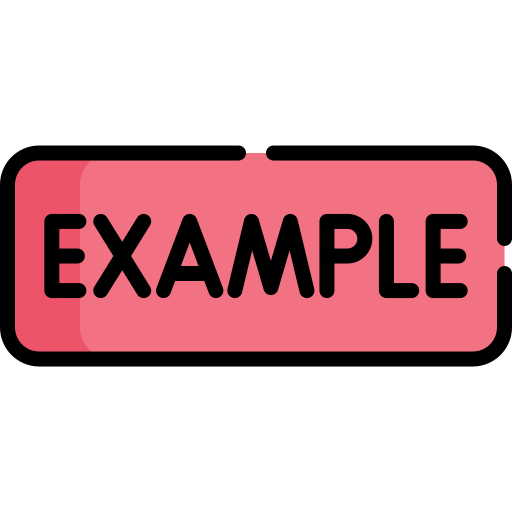

(512, 512, 4)


In [80]:
def path_to_matrix(path):
    image = Image.open(path)
    image_array = np.array(image)
    display_as_img(image_array)
    return image_array

# image_path="../img/atp.png"
image_path="../img/example.png"

## Convert to greyscale

/tmp/ipykernel_476482/3669424881.py:22: RuntimeWarning: invalid value encountered in cast
  rgba_image = np.stack([image_array]*3 + [255*(~np.isnan(image_array))], axis=-1).astype('uint8')


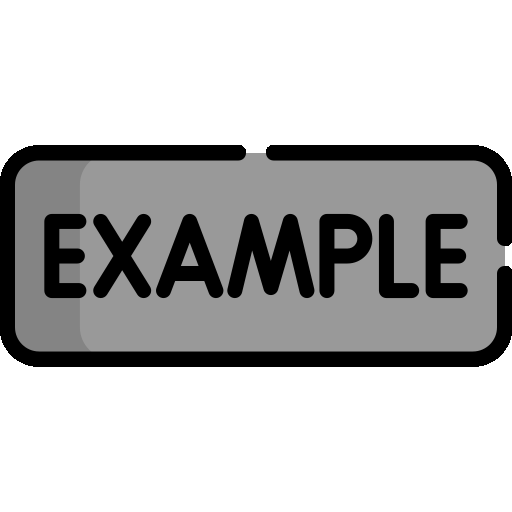

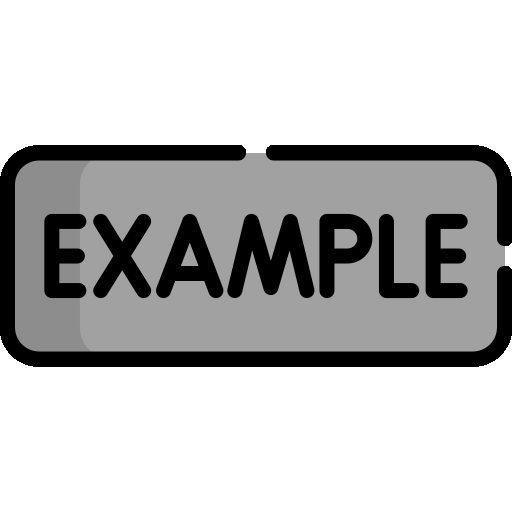

In [7]:
def np_to_greyscale_pondered(image_array):
    greyscaled = np.zeros((image_array.shape[0], image_array.shape[1]))
    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            if image_array[i,j,3] == 0:
                greyscaled[i,j] = np.nan
            else:
                greyscaled[i,j] = 0.2989 * image_array[i,j,0] + 0.5870 * image_array[i,j,1] + 0.1140 * image_array[i,j,2]
    return greyscaled

def np_to_greyscale_arithmetic(image_array):
    greyscaled = np.zeros((image_array.shape[0], image_array.shape[1]))
    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            if image_array[i,j,3] == 0:
                greyscaled[i,j] = np.nan
            else:
                greyscaled[i,j] = 0.33333*image_array[i,j,0] + 0.33333*image_array[i,j,1] + 0.33333*image_array[i,j,2]
    return greyscaled

def to_png(image_array):
    rgba_image = np.stack([image_array]*3 + [255*(~np.isnan(image_array))], axis=-1).astype('uint8')
    return Image.fromarray(rgba_image, 'RGBA')

gs_1 = np_to_greyscale_pondered(image_array)
gs_2 = np_to_greyscale_arithmetic(image_array)

img = to_png(gs_1)
display(img)
img = to_png(gs_2)
display(img)

## Image to zones

### Color distance

In [8]:
def color_distance(color_1, color_2):
    diff_1 = color_1[0] - color_2[0]
    diff_2 = color_1[1] - color_2[1]
    diff_3 = color_1[2] - color_2[2]
    diff_4 = color_1[3] - color_2[3]
    return (abs(diff_1) + abs(diff_2) + abs(diff_3) + abs(diff_4)) / (255*4)    

### Rasterize the imatge (delimitate the zones)

In [41]:
def np_to_zones(image_array, threshold):
    rows = image_array.shape[0]
    cols = image_array.shape[1]
    zones_array = np.full((rows, cols, 4), [-1,-1,-1,-1])
    for i in range(rows):
        for j in range(cols):
                if zones_array[i,j,0] == -1:
                    zones_array[i,j] = image_array[i,j]
                if j<cols-1 and color_distance(zones_array[i,j],image_array[i,j+1]) < threshold:
                    zones_array[i,j+1] = zones_array[i,j]
                if j>0 and i<rows-1 and color_distance(zones_array[i,j],image_array[i+1,j-1]) < threshold:
                    zones_array[i+1,j-1] = zones_array[i,j]
                if i<rows-1 and color_distance(zones_array[i,j],image_array[i+1,j]) < threshold:
                    zones_array[i+1,j] = zones_array[i,j]
                if j<cols-1 and i<rows-1 and color_distance(zones_array[i,j],image_array[i+1,j+1]) < threshold:
                    zones_array[i+1,j+1] = zones_array[i,j]
    return zones_array

In [87]:
image_path="../img/atp.png"
# image_path="../img/example.png"
xd=np_to_zones(image_array, 0.01)

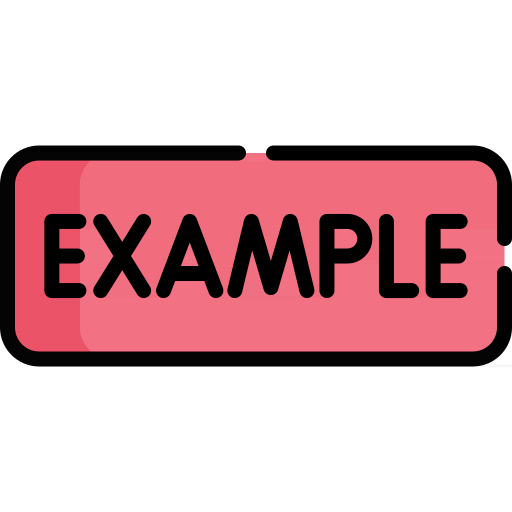

(512, 512, 4)


In [88]:
display_as_img(xd)